In [0]:
import sklearn as sk
from sklearn.preprocessing import scale
import random
import os
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
warnings.filterwarnings('ignore')


%matplotlib inline

In [0]:
train_transaction = pd.read_csv('train_transaction.csv',low_memory=False)
train_identity = pd.read_csv('train_identity.csv',low_memory=False)
test_transaction = pd.read_csv('test_transaction.csv', low_memory=False)
test_identity = pd.read_csv('test_identity.csv',low_memory=False)

In [0]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [0]:
del train_transaction
del train_identity
del test_transaction
del test_identity

In [5]:
null_percent = train.isnull().sum()/train.shape[0]*100

cols_to_drop = np.array(null_percent[null_percent > 50].index)

cols_to_drop

array(['dist1', 'dist2', 'R_emaildomain', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D11', 'D12', 'D13', 'D14', 'M1', 'M2', 'M3', 'M4', 'M5',
       'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49',
       'V50', 'V51', 'V52', 'V138', 'V139', 'V140', 'V141', 'V142',
       'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150',
       'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158',
       'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166',
       'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174',
       'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182',
       'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190',
       'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198',
       'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206',
       'V

In [0]:
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop,axis=1)

In [0]:
null_percent = test.isnull().sum()/train.shape[0]*100
null_percent_great_zero = null_percent[null_percent > 0]

In [0]:
null_cols = null_percent_great_zero.index.tolist()

In [9]:
null_cols

['card2',
 'card4',
 'card5',
 'addr1',
 'addr2',
 'P_emaildomain',
 'D1',
 'D2',
 'D3',
 'D10',
 'D15',
 'M6',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V279',
 'V280',
 'V281',
 'V282',
 'V283',
 'V284',
 'V285',
 'V286',
 'V287',
 'V288',
 'V289',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V296',
 'V297',
 'V298',
 'V299',
 'V300',
 'V301',
 'V302',
 'V303',
 'V304',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V313',
 'V314',
 'V315',
 'V316',
 'V317',
 'V318',
 'V319',

In [10]:
for i in null_cols:
    print('data type of {} is {}'.format(i, str(train[i].dtype)))
    train[i] = train[i].replace(np.nan, train[i].mode()[0])
    test[i] = test[i].replace(np.nan, train[i].mode()[0])
    print('Filled the null values of column {}'.format(i))
    print('--------------------------------------------')

data type of card2 is float64
Filled the null values of column card2
--------------------------------------------
data type of card4 is object
Filled the null values of column card4
--------------------------------------------
data type of card5 is float64
Filled the null values of column card5
--------------------------------------------
data type of addr1 is float64
Filled the null values of column addr1
--------------------------------------------
data type of addr2 is float64
Filled the null values of column addr2
--------------------------------------------
data type of P_emaildomain is object
Filled the null values of column P_emaildomain
--------------------------------------------
data type of D1 is float64
Filled the null values of column D1
--------------------------------------------
data type of D2 is float64
Filled the null values of column D2
--------------------------------------------
data type of D3 is float64
Filled the null values of column D3
-----------------------

In [0]:
X = train.drop('isFraud', axis=1)
y = train['isFraud']

In [12]:
cat_data = X.select_dtypes(include='object')
num_data = X.select_dtypes(exclude='object')

cat_cols = cat_data.columns.values
num_cols = num_data.columns.values

print('Categorical Columns : ',cat_cols)
print('Numerical Columns : ',num_cols)

Categorical Columns :  ['ProductCD' 'card4' 'card6' 'P_emaildomain' 'M6']
Numerical Columns :  ['TransactionID' 'TransactionDT' 'TransactionAmt' 'card1' 'card2' 'card3'
 'card5' 'addr1' 'addr2' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9'
 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2' 'D3' 'D10' 'D15' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'V29' 'V30' 'V31' 'V32' 'V33' 'V34' 'V53' 'V54' 'V55'
 'V56' 'V57' 'V58' 'V59' 'V60' 'V61' 'V62' 'V63' 'V64' 'V65' 'V66' 'V67'
 'V68' 'V69' 'V70' 'V71' 'V72' 'V73' 'V74' 'V75' 'V76' 'V77' 'V78' 'V79'
 'V80' 'V81' 'V82' 'V83' 'V84' 'V85' 'V86' 'V87' 'V88' 'V89' 'V90' 'V91'
 'V92' 'V93' 'V94' 'V95' 'V96' 'V97' 'V98' 'V99' 'V100' 'V101' 'V102'
 'V103' 'V104' 'V105' 'V106' 'V107' 'V108' 'V109' 'V110' 'V111' 'V112'
 'V113' 'V114' 'V115' 'V116' 'V117' 'V118' 'V119' 'V120' 'V121' 'V122'
 'V123' 'V124' 'V125' 'V126' 'V127' 'V128' 'V129' 'V130' 'V131' 'V132'
 'V133' 'V134' 'V135' 'V136' 'V137' 'V279' 

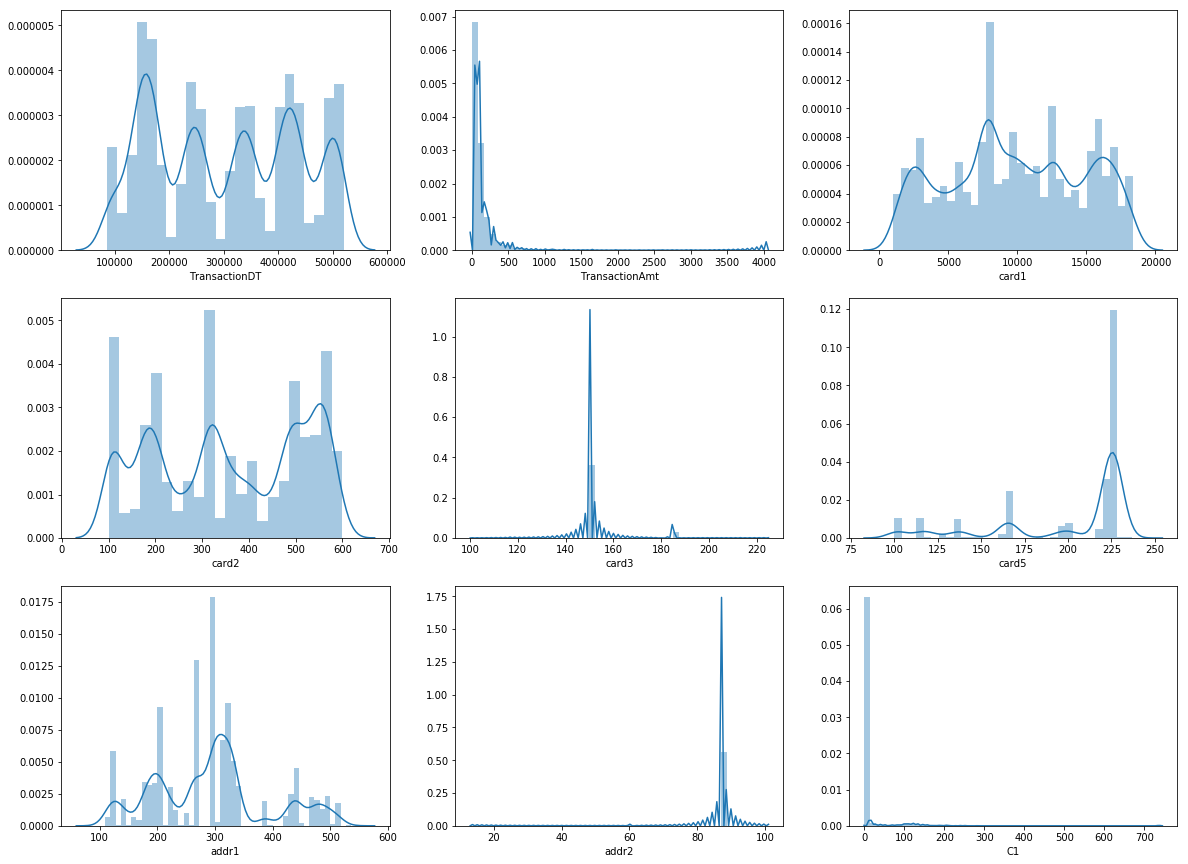

In [13]:
fig = plt.figure(figsize=(20,15))

j = 1
for i in num_cols[1:10]:
    plt.subplot(3,3,j)
    sns.distplot(a=X[i])
    j = j + 1
    
plt.show()

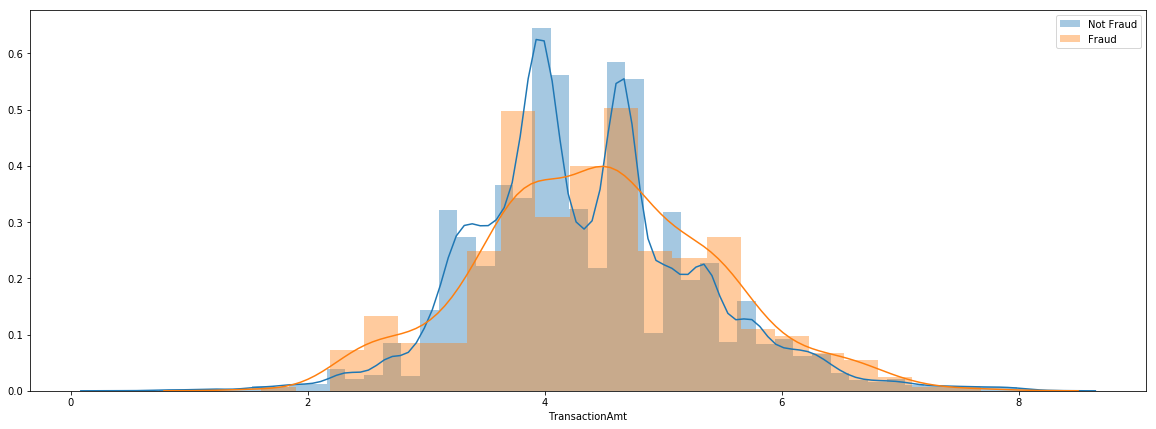

In [14]:
df1 = train[train['isFraud'] == 0]
not_fraud = df1['TransactionAmt'].apply(np.log) #we will apply log transformation to get better visualization 

df2 = train[train['isFraud'] == 1]
fraud = df2['TransactionAmt'].apply(np.log) #we will apply log transformation to get better visualization 

plt.figure(figsize=(20, 7))

sns.distplot(a=not_fraud, label='Not Fraud')
sns.distplot(a=fraud, label='Fraud')

plt.legend()

In [0]:
X['TransactionAmt'] = X['TransactionAmt'].apply(np.log)
test['TransactionAmt'] = test['TransactionAmt'].apply(np.log)

In [0]:
X = X.drop('TransactionDT', axis=1)
test = test.drop('TransactionDT', axis=1)

In [0]:
del train

In [18]:
from sklearn.preprocessing import LabelEncoder

for i in tqdm(cat_cols): 
    label = LabelEncoder()
    label.fit(list(X[i].values)+list(test[i].values))
    X[i] = label.transform(list(X[i].values))
    test[i] = label.transform(list(test[i].values))

100%|██████████| 5/5 [00:00<00:00, 32.62it/s]


In [20]:
X.head()

,TransactionID,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D10,D15,M6,V12,V13,V14,V15,V16,V17,V18,V19,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,4.226834,4,13926,321.0,150.0,1,142.0,0,315.0,87.0,16,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,0.0,13.0,13.0,0.0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,3.367296,4,2755,404.0,150.0,2,102.0,0,325.0,87.0,16,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,4.077537,4,4663,490.0,150.0,3,166.0,1,330.0,87.0,35,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,315.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,3.912023,4,18132,567.0,150.0,2,117.0,1,476.0,87.0,53,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,84.0,111.0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,3.912023,1,4497,514.0,150.0,2,102.0,0,420.0,87.0,16,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X = X.drop('TransactionID', axis=1)
test = test.drop('TransactionID', axis=1)

In [0]:
c = X.corr()

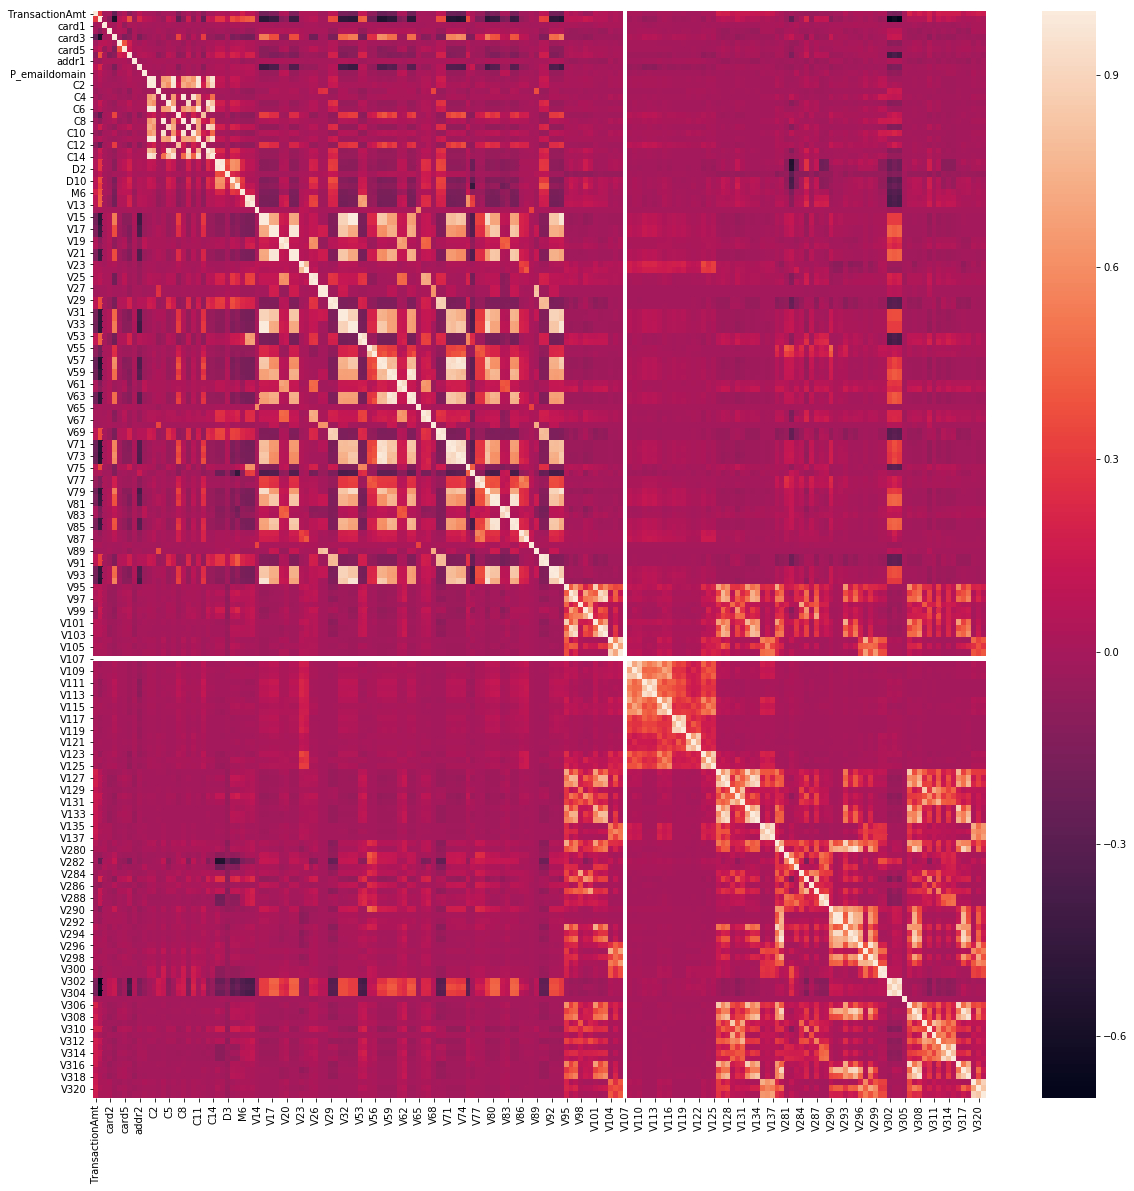

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(c)

In [0]:
col_corr = set()
for i in range(len(c.columns)):
    for j in range(i):
        if (c.iloc[i, j] >= 0.95) and (c.columns[j] not in col_corr):
            colname = c.columns[i] # getting the name of column
            col_corr.add(colname)

In [25]:
cols = X.columns
print('{} and {}'.format(len(cols), len(col_corr)))

182 and 37


In [0]:
final_columns = []

for i in cols:
    if i in col_corr:
        continue
    else:
        final_columns.append(i)

In [0]:
X1 = X[final_columns]
test1 = test[final_columns]

In [28]:
print(X1.shape)
print(test1.shape)

(20192, 145)
(21077, 145)


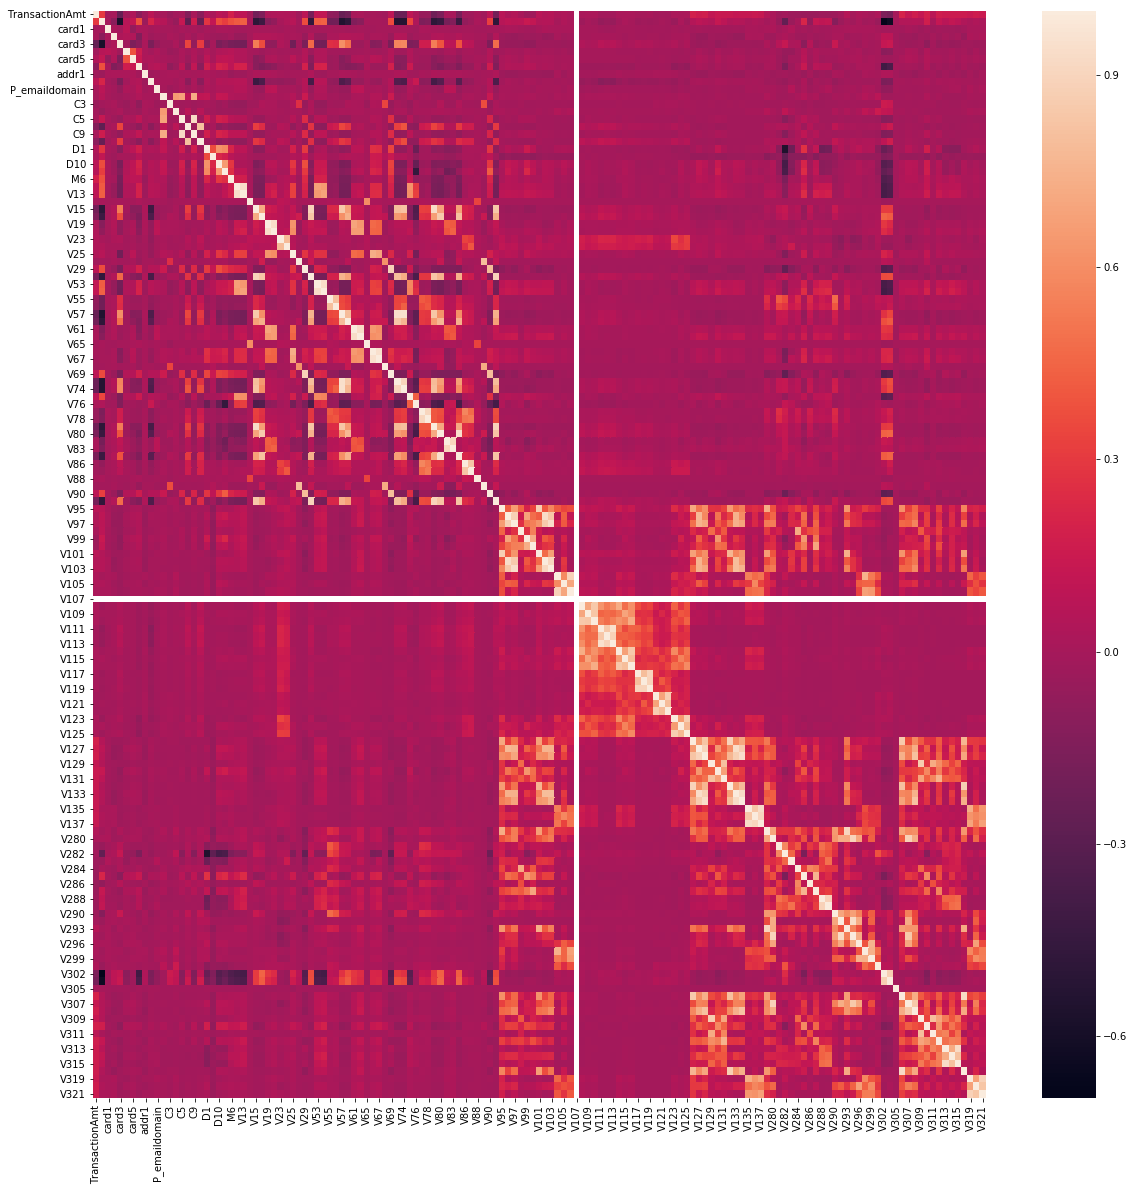

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(X1.corr())

In [0]:
del X
del test

In [0]:
params = {'objective': 'binary',  
          'learning_rate': 0.1, 
          'num_leaves': 256,
          'is_unbalance': True, 
          'metric': 'auc', 
          'feature_fraction': 0.8, 
          'verbosity': -1,
          'random_state': 42
          }

In [33]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score_lgb = []
i = 1
predictions = np.zeros(test1.shape[0])

print('5 Fold Stratified Cross Validation')
print('-----------------------------------')
for train_index, test_index in kf.split(X1, y):
    print('Fold no. {}'.format(i))
    xtr, ytr = X1.loc[train_index], y.loc[train_index]
    xv, yv = X1.loc[test_index], y.loc[test_index]
    
    df_train = lgb.Dataset(xtr, label=ytr)
    df_val = lgb.Dataset(xv, label=yv)
    
    clf1 = lgb.train(params, num_boost_round = 5000,train_set = df_train, valid_sets=[df_train, df_val], verbose_eval=400, early_stopping_rounds=200)
    ypred =  clf1.predict(xv)
    score = f1_score(yv, ypred.round())
    print('F1-Score : {}'.format(score))
    cv_score_lgb.append(score)
    predictions = predictions + clf1.predict(test1)/5
    i += 1
    print('-------------------------------------')

5 Fold Stratified Cross Validation
-----------------------------------
Fold no. 1
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[19]	training's auc: 1	valid_1's auc: 0.862536
F1-Score : 0.5405405405405405
-------------------------------------
Fold no. 2
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[24]	training's auc: 1	valid_1's auc: 0.882395
F1-Score : 0.6066350710900474
-------------------------------------
Fold no. 3
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[29]	training's auc: 1	valid_1's auc: 0.824552
F1-Score : 0.4945054945054945
-------------------------------------
Fold no. 4
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[33]	training's auc: 1	valid_1's auc: 0.889251
F1-Score : 0.6736842105263158
-------------------------------------
Fold no. 5
Training until validat

In [0]:
feature_dict = {'Features': clf1.feature_name(), 'Importance': clf1.feature_importance()}

In [0]:
feature_imp = pd.DataFrame(feature_dict).sort_values(by=['Importance'], ascending=False)

In [36]:
feature_imp.head(10)

,Features,Importance
2,card1,962
0,TransactionAmt,843
8,addr1,707
3,card2,692
10,P_emaildomain,364
6,card5,350
20,D10,273
11,C1,258
21,D15,255
18,D1,250


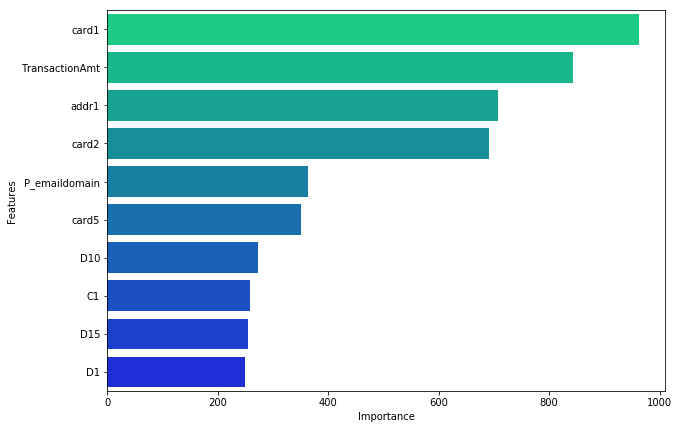

In [37]:
plt.figure(figsize=(10,7))
df_imp = feature_imp.head(10)
sns.barplot(y=df_imp['Features'], x=df_imp['Importance'], palette='winter_r')